## Introduction to Neural Networks

Neural networks are a powerful element of the modern machine learning toolbox. It can seem intimidating for a developer to get started due to the volume and depth of material available on them. This tutorial will go through the basics of how neural networks work and tie it in with a practical example - highlighting how it is possible to jump in with ease.

The model for the a single "neuron" in the network is based on the biological neural cell; we will see from the picture below how this analogizes to our context.
<img src="Picture1.png">

Thus, we define the neurons in our network to look as such - with each input coming in and multiplied by a weight factor. Then we take the sum of all these weighted inputs and pass it through an "activation function".
<img src="Picture2.png">

By joining these neurons together and connecting them in "layers" (with each output from a previous layer becoming an input for each neuron the next layer), we form the basic neural network (also called a multi-layer perceptron model). 
<img src="Picture3.png">

We will later discuss how to figure out the correct weights so that the neural network does what we want it to do.




In [2]:
import network
import mnist_loader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import PIL.ImageOps

We load the training and test data - in this case, the widely used MNIST handwritten digit data set. Feel free to take a look at mnist_loader.py in the folder to get an idea of how we're manipulating the MNIST data into the right type of shape and array to use in our neural network implementation.

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

Here we load up several examples of images from the training set and display them so we can see what kinds of images we are training the neural network on. 

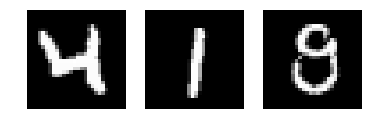

In [4]:
example_img_1 = np.array(training_data[20][0]).flatten().reshape((28,28))
example_img_2 = np.array(training_data[40][0]).flatten().reshape((28,28))
example_img_3 = np.array(training_data[80][0]).flatten().reshape((28,28))
plt.subplot(131)
plt.imshow(example_img_1, cmap="gray")
plt.axis('off')
plt.subplot(132)
plt.imshow(example_img_2, cmap="gray")
plt.axis('off')
plt.subplot(133)
plt.imshow(example_img_3, cmap="gray")
plt.axis('off')
plt.show(block=False)

The key concepts in the training algorithm for neural networks for the teaching example that we're working with are __stochastic gradient descent__ and __backpropogation__. In our example we'll create a network that looks like the one below, but with thirty neurons in the hidden layer instead of fifteen.
<img src="Picture4.png">

We can look at the network.py code to see a bit of what's going on behind the scenes. 


Epoch 0: 7915 / 10000


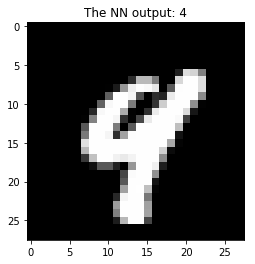

Epoch 1: 8110 / 10000


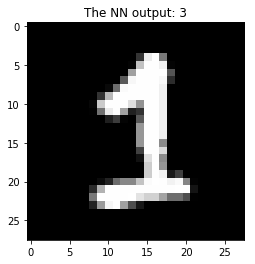

Epoch 2: 8185 / 10000


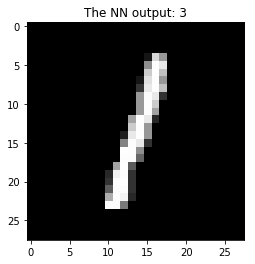

Epoch 3: 8222 / 10000


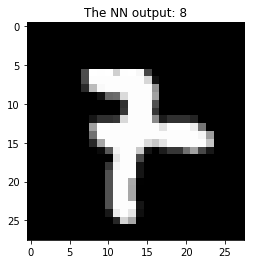

Epoch 4: 8250 / 10000


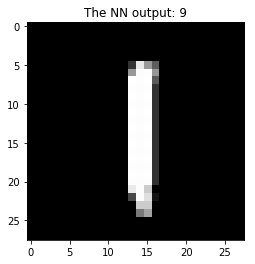

Epoch 5: 8269 / 10000


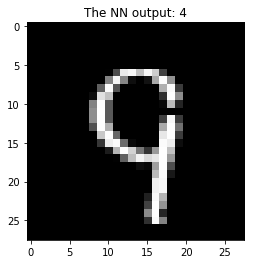

Epoch 6: 8294 / 10000


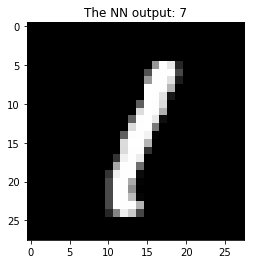

Epoch 7: 8320 / 10000


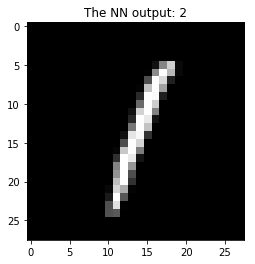

Epoch 8: 8326 / 10000


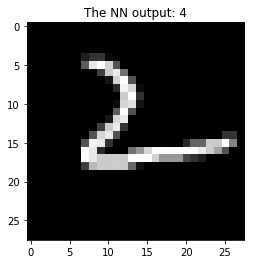

Epoch 9: 8316 / 10000


In [5]:
net = network.Network([784,30,10])
net.SGD(training_data, 10, 10, 3.0, test_data = test_data)

Now that the network is trained, we can apply it to other images too! Let's define some functions that help us to take a cellphone image and pass it through our trained neural network. The function $\texttt{rgb2gray}$ converts a RGB image to grayscale, and the function $\texttt{cleanimg}$ converts the image into something that we can use in our neural network implementations

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def cleanimg(filename):
    img = Image.open(filename)
    img.thumbnail((28, 28), Image.ANTIALIAS)
    npimg = np.array(img)
    print(img.size)
    grayimg = (255 - rgb2gray(npimg))/255
    grayimg = grayimg - np.percentile(grayimg,80)
    grayimg = grayimg/np.amax(grayimg)
    grayimg = np.clip(grayimg,0,1)
    return grayimg

The image that I'll be using can be found in the folder - there are a few other test images and you can even upload your own! (Make sure that the image is cropped to be square though, otherwise the image may not turn out to be 28x28)

In [7]:
img = cleanimg("test6.png")

(28, 28)


We simply feed the formatted image into our neural network and see what kind of result we get!

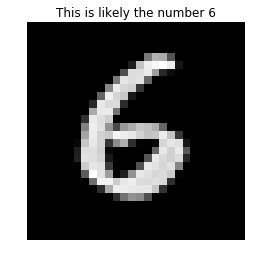

In [8]:
plt.figure(1)
plt.title("This is likely the number " + str(np.argmax(net.feedforward(img.reshape((784,1))))))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

We can now examine the exact same data set using an open-source and widely adopted tool, the scikit-learn machine learning package for Python. We'll see that similarly to the teaching network class, training and implementing a neural network using scikit-learn takes only a few lines (and follows the same coding practices as any other machine learning model)

In [9]:
from sklearn.neural_network import MLPClassifier

Here we use the exact same data set as in the other example, but manipulate it again to be the correct type of input for the scikit-learn Multi-Layer Perceptron Classifier

In [10]:
molded_data = zip(*training_data)
training_inputs = [np.squeeze(x) for x in molded_data[0]]
training_outputs = [np.squeeze(x) for x in molded_data[1]]
molded_data = zip(*test_data)
test_inputs = [np.squeeze(x) for x in molded_data[0]]
test_outputs = [np.squeeze(x) for x in molded_data[1]]

We train the neural network using the same kinds of parameters as in the teaching example, and the same number of neurons, activation function, and optimization solver

In [11]:
clf = MLPClassifier(hidden_layer_sizes=(30,),activation="logistic",solver="sgd")
clf.fit(training_inputs,training_outputs)
MLPoutput = clf.predict(test_inputs)

/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


We can analyze our results from running it with MLPClassifier in the same way that we analyzed the previous version of the neural network, and arrive at a similar success rate

In [12]:
predict_outputs = [np.argmax(x) for x in MLPoutput]
sum = 0
diff = [a - b for a, b in zip(test_outputs, predict_outputs)]
for i in diff:
    if i == 0:
        sum += 1
print(100*float(sum)/len(diff))

89.22


And applying it to the same image...

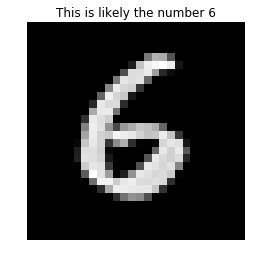

In [13]:
plt.figure(1)
plt.title("This is likely the number " + str(np.argmax(clf.predict(np.squeeze(img.reshape((784,1))).reshape(1,-1)))))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

Now that we have both neural nets trained and available, we can also try them out on some real world data!

(28, 28)


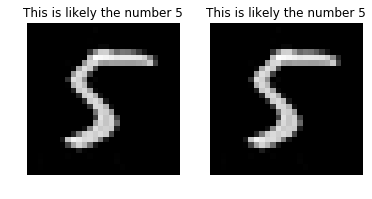

In [25]:
img = cleanimg("test5.png")

plt.figure(3)
plt.subplot(121)
plt.title("This is likely the number " + str(np.argmax(net.feedforward(img.reshape((784,1))))))
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(122)
plt.title("This is likely the number " + str(np.argmax(clf.predict(np.squeeze(img.reshape((784,1))).reshape(1,-1)))))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()

## Conclusion

Using both methods, we were able to get meaningful results on real handwritten digit data while learning the fundamentals of neural networks. Hopefully, these examples demosntrated how quickly one can learn and apply some of the basic machine learning tools!